In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy import stats
from scipy.optimize import curve_fit

In [4]:
def peak(x,height,centre,width):
    '''plots a gaussian'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))

In [5]:
def addnoise(pure):
    '''adds noise'''
    vary = np.random.uniform(0,1,pure.shape)
    signal=-(pure*np.log(vary))
    return signal

In [6]:
def bin_it(yvalues,binsize):
    '''groups an array in groups of a given size then averaging them'''
    N=int(math.ceil(len(yvalues)/binsize))
    #finds number of times code should loop, taking into acount the final group may be smaller than binsize
    C=0
    newy=[] #list for new y array
    while C<N:
        if (C+1)*binsize<len(yvalues): #if the end of the bin is still inside the orignal array
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize #group of binsize averaged
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
            #if end of bin would be oustide the array use end of the array as the end of the bin
        newy.append(Q)
        C+=1
    return np.array(newy)

In [12]:
def runsimswithfit2(noiseheight,binsizes,init_values):
    '''runs the simulations changing both noise height and binsize. Then fits a gaussian to the noisy data and compares the
    fitted gaussian to the orignal gaussian using the Kolmogorov–Smirnov test'''
    fig, axs = plt.subplots(1, 1+len(binsizes) ,figsize=(15,8)) #genrates needed subplots
    axs = axs.ravel()
    for i in range(1+len(binsizes)):
        if i==0:        
            y=np.full((1,len(x)),noiseheight) #noise line
            fulldata=addnoise(np.maximum(peak(x,init_values[0],init_values[1],init_values[2]),y[0])) #combines noise line and gaussian, and adds noise
            axs[i].plot(x,fulldata,label='full plot') 
            axs[i].plot(x,y[0],label='noise height') #noise line
            axs[i].plot(x,peak(x,init_values[0],init_values[1],init_values[2]),label='gaussian') #gaussian peak
            ratio=1/noiseheight #finds ratio 
            axs[i].legend()
            axs[i].set_xlim(0,3)
            axs[i].title.set_text(f'raw data noise height: {noiseheight}') 
        else:
            axs[i].plot(x[0::binsizes[i-1]],bin_it(fulldata,binsizes[i-1]),label='binned data') #bins the data for a given bin size
            axs[i].plot(x,peak(x,init_values[0],init_values[1],init_values[2]),label='gaussian original',color='green') # original gaussian peak
            best_vals, covar = curve_fit(peak, x[0::binsizes[i-1]], bin_it(fulldata,binsizes[i-1]), p0=init_guess)
            axs[i].plot(x,peak(x,best_vals[0],best_vals[1],best_vals[2]),label='gaussian fit',color='purple') #fitted gaussian peak
            k=2*binsizes[i-1] #calculates k
            axs[i].set_xlim(0,3)
            axs[i].legend(loc='lower center')
            axs[i].title.set_text(f'bin size {binsizes[i-1]} k={k}')
            KSval=scipy.stats.ks_2samp(peak(x,init_values[0],init_values[1],init_values[2]), peak(x,best_vals[0],best_vals[1],best_vals[2]))
            print(f'KS results for binsize {binsizes[i-1]} noise height {noiseheight}: {KSval[0]}')
    print('')
    return

KS results for binsize 10 noise height 0.1: 0.16167664670658688
KS results for binsize 20 noise height 0.1: 0.14171656686626743
KS results for binsize 30 noise height 0.1: 0.17764471057884235

KS results for binsize 10 noise height 0.2: 0.3053892215568862
KS results for binsize 20 noise height 0.2: 0.3053892215568862
KS results for binsize 30 noise height 0.2: 0.29940119760479045

KS results for binsize 10 noise height 0.3: 0.13173652694610782
KS results for binsize 20 noise height 0.3: 0.14171656686626743
KS results for binsize 30 noise height 0.3: 0.12375249500998009

KS results for binsize 10 noise height 0.4: 0.18562874251497008
KS results for binsize 20 noise height 0.4: 0.1956087824351297
KS results for binsize 30 noise height 0.4: 0.18562874251497008

KS results for binsize 10 noise height 0.5: 0.3133732534930139
KS results for binsize 20 noise height 0.5: 0.29740518962075846
KS results for binsize 30 noise height 0.5: 0.32135728542914177

KS results for binsize 10 noise height 

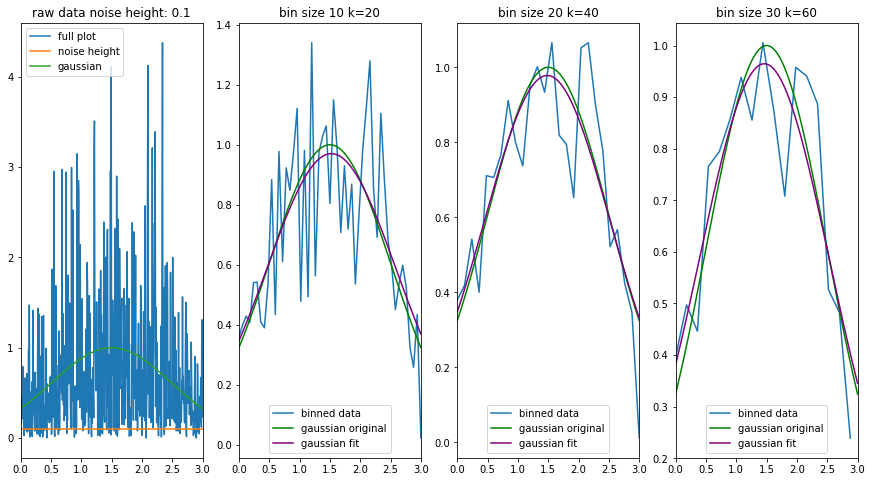

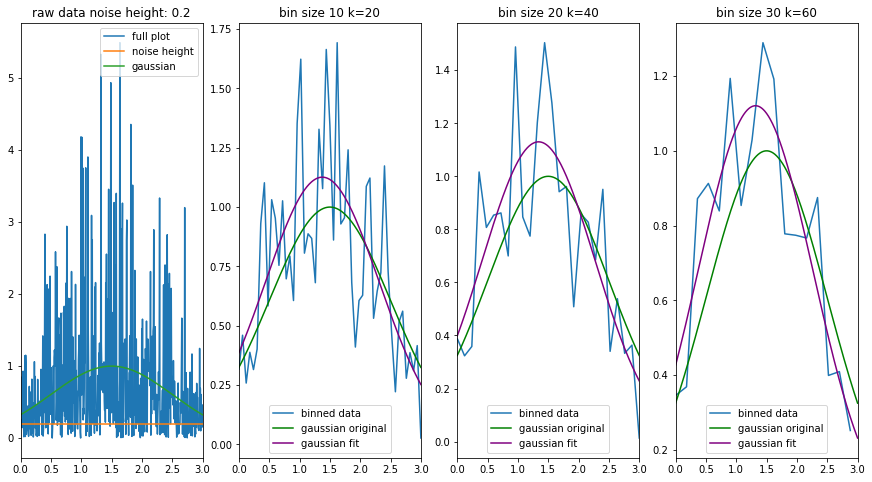

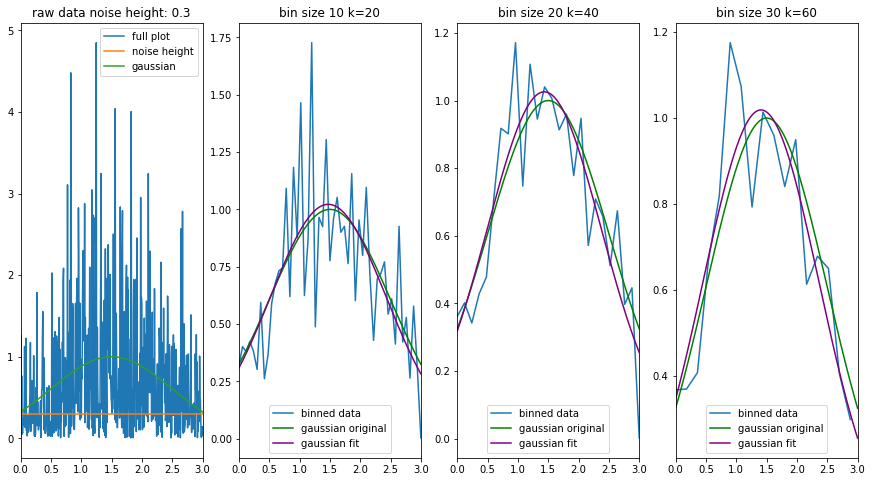

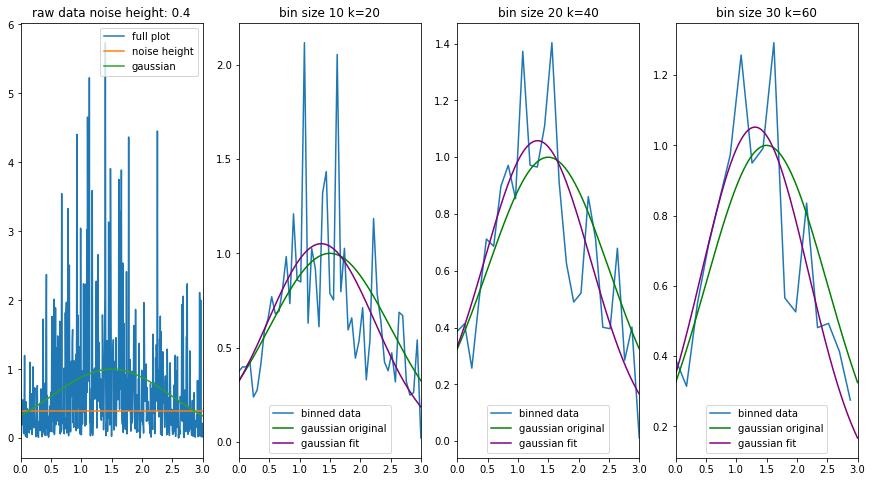

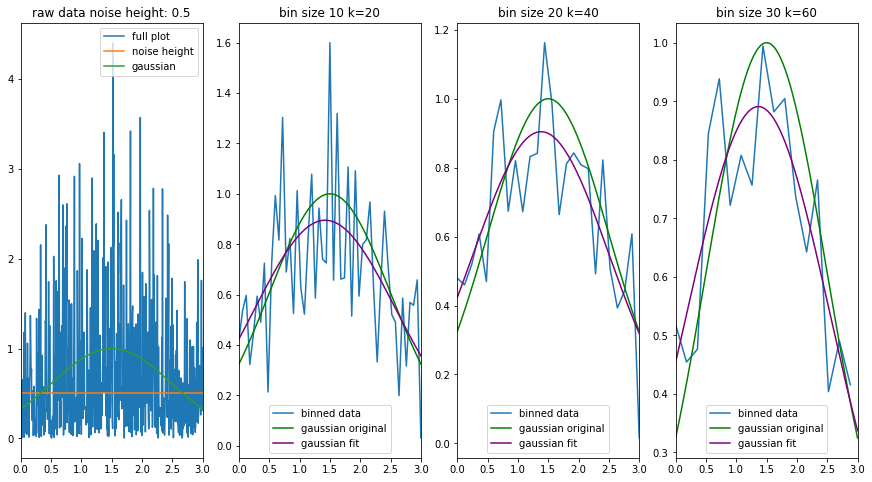

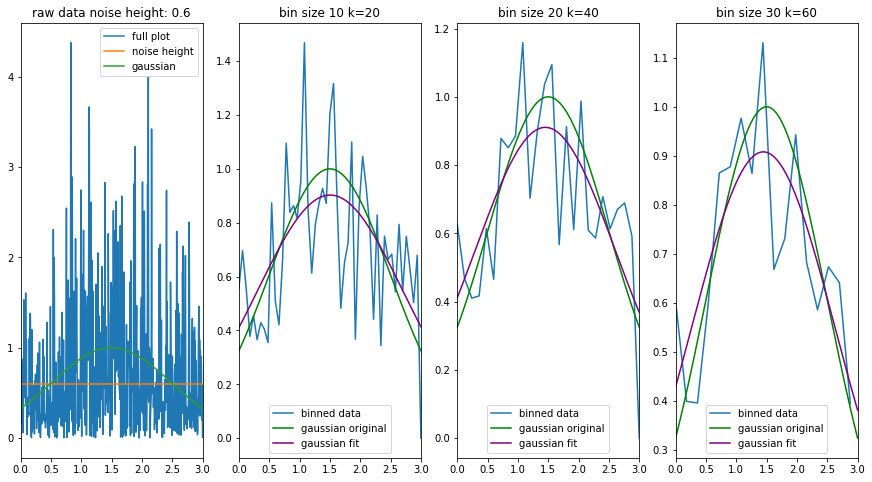

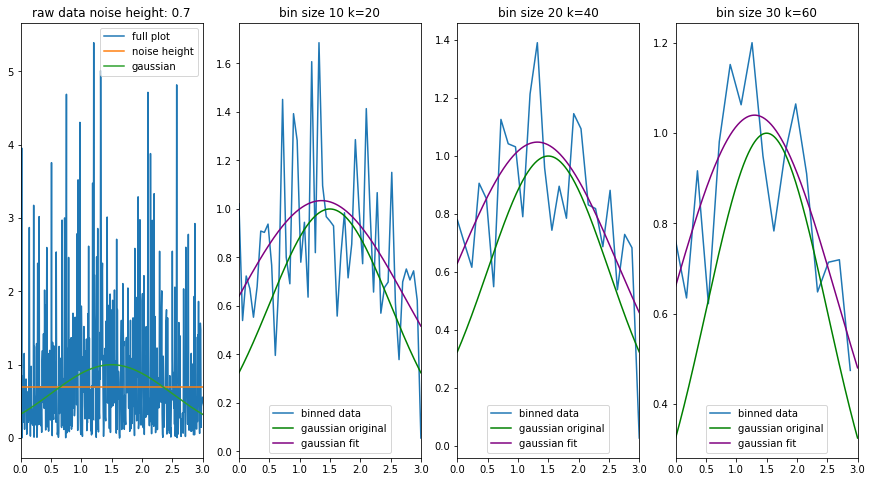

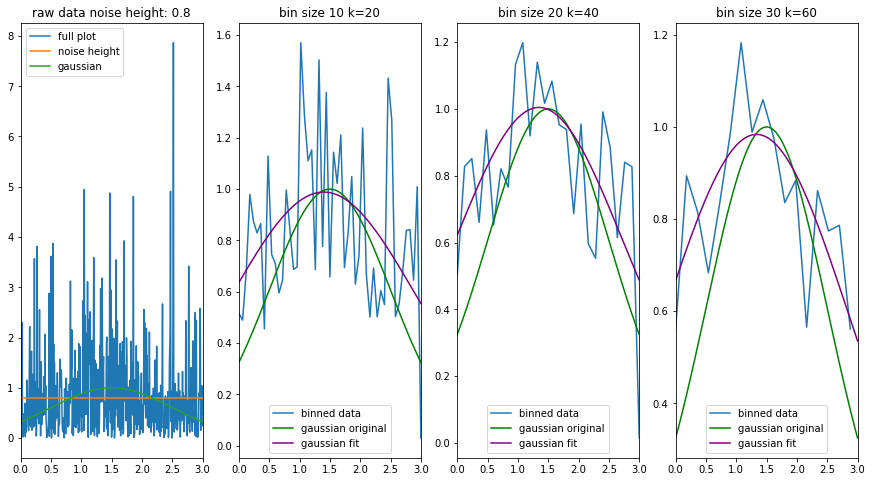

In [13]:
x=np.linspace(0,3,501) #x values
init_guess = [1,1.5,1]  # for [amp, cen, wid] intial guess for curve fit
init_values = [1,1.5,1] #intial values for original gaussian
noiseheights=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8] #noiseheights to loop with
binsizes=np.array([10,20,30])
for n in noiseheights:
    runsimswithfit2(n,binsizes,init_values) #loops through the sims at different noise heights